## P3.1 Metoda Eulera

- Zaprogramować metodę Eulera (wzór jawny i wsteczny), a następnie zastosować ją do równania $ y' = 1 − 2t + 4y $.
- Rozwiązać zagadnienie początkowe $y(0) = 1$ w przedziale $t \in [0, 2]$. 
- Jakim wzorem wyraża się rozwiązanie dokładne? 
- Znaleźć rozwiązanie przybliżone za pomoca obu wariantów metody Eulera.
- Skomentować wyniki.

#### Metoda Eulera (wzór jawny): 
$ y_0 = y(t_0) $, $ y_{k+1} = y_k + h\cdot f(t_k, y_k) $

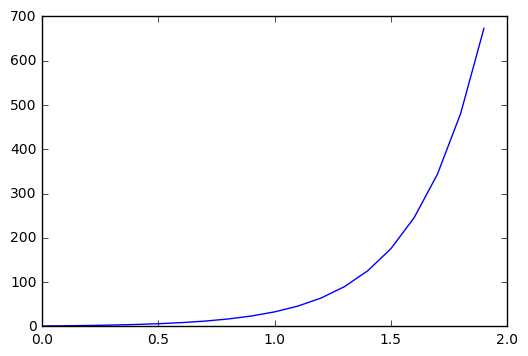

In [9]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def euler_method(equation, symbols, y0, rng, h):
    yp_sym, y_sym, t_sym = symbols
    t0, tn = rng
    
    f = sp.solve(equation, yp_sym)[0]
    
    t = np.arange(t0,tn,h)
    y = np.zeros_like(t)
    y[0] = y0
    for k in range(1, len(t)):
        y[k] =  y[k-1] + h * f.subs([(t_sym, t[k-1]), (y_sym, y[k-1])])
    
    return t, y

yp, y, t = sp.symbols('yp y t')
equation = sp.Eq(yp, 1 - 2*t + 4*y)

t,y = euler_method(equation, (yp, y, t), 1, (0, 2), 0.1)

plt.plot(t, y)
plt.show()

#### Metoda Eulera (wzór niejawny/wsteczny): 
$ y_0 = y(t_0) $, $ y_{k+1} = y_k + h\cdot f(t_{k+1}, y_{k+1}) $

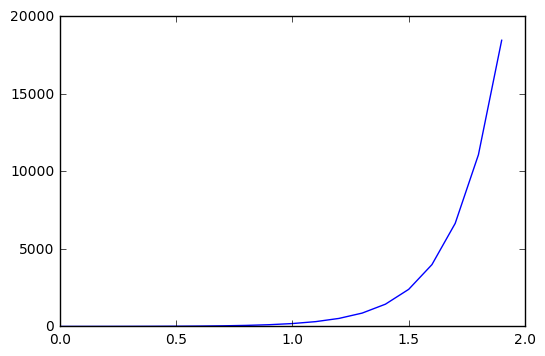

In [10]:
def backward_euler_method(equation, symbols, y0, rng, h):
    yp_sym, y_sym, t_sym = symbols
    t0, tn = rng
    
    f = sp.solve(equation, yp_sym)[0]
    
    t = np.arange(t0,tn,h)
    y = np.zeros_like(t)
    y[0] = y0
    for k in range(1, len(t)):
        ynext = sp.symbols('ynext')
        eq = sp.Eq(ynext, y[k-1] + h * f.subs([(t_sym, t[k]), (y_sym, ynext)]))
        y[k] =  sp.solve(eq, ynext)[0]

    return t, y

yp, y, t = sp.symbols('yp y t')
equation = sp.Eq(yp, 1 - 2*t + 4*y)

t,y = backward_euler_method(equation, (yp, y, t), 1, (0, 2), 0.1)

plt.plot(t, y)
plt.show()